In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px 
import plotly.graph_objects as go
import nbformat
from plotly.subplots import make_subplots
import six  
import numpy as np
from numpy import random as rand 
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.figure_factory as ff


### Data exploration & summary

#### Full dataset exploration

In [2]:
# Load the CSV file into a DataFrame
df_full = pd.read_csv("Telco_data/Telco_customer_churn.csv",  sep=";")
# Display the DataFrame 
print(df_full.head())

print(df_full.info())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude    Longitude  Gender  ...  \
0  33.964131, -118.272783  33,964131  -118,272783    Male  ...   
1   34.059281, -118.30742  34,059281  -118,307420  Female  ...   
2  34.048013, -118.293953  34,048013  -118,293953  Female  ...   
3  34.062125, -118.315709  34,062125  -118,315709  Female  ...   
4  34.039224, -118.266293  34,039224  -118,266293    Male  ...   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month         

In [4]:
# check for missing values:

df_full.isnull().sum()

## the missing values are the Churn Category and Churn Reason for the customers who stayed.


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [4]:
# Check data types
print(df_full.dtypes)

CustomerID           object
Count                 int64
Country              object
State                object
City                 object
Zip Code              int64
Lat Long             object
Latitude             object
Longitude            object
Gender               object
Senior Citizen       object
Partner              object
Dependents           object
Tenure Months         int64
Phone Service        object
Multiple Lines       object
Internet Service     object
Online Security      object
Online Backup        object
Device Protection    object
Tech Support         object
Streaming TV         object
Streaming Movies     object
Contract             object
Paperless Billing    object
Payment Method       object
Monthly Charges      object
Total Charges        object
Churn Label          object
Churn Value           int64
Churn Score           int64
CLTV                  int64
Churn Reason         object
dtype: object


In [5]:
# Summarize the numerical variables
print(df_full.describe())

        Count      Zip Code  Tenure Months  Churn Value  Churn Score  \
count  7043.0   7043.000000    7043.000000  7043.000000  7043.000000   
mean      1.0  93521.964646      32.371149     0.265370    58.699418   
std       0.0   1865.794555      24.559481     0.441561    21.525131   
min       1.0  90001.000000       0.000000     0.000000     5.000000   
25%       1.0  92102.000000       9.000000     0.000000    40.000000   
50%       1.0  93552.000000      29.000000     0.000000    61.000000   
75%       1.0  95351.000000      55.000000     1.000000    75.000000   
max       1.0  96161.000000      72.000000     1.000000   100.000000   

              CLTV  
count  7043.000000  
mean   4400.295755  
std    1183.057152  
min    2003.000000  
25%    3469.000000  
50%    4527.000000  
75%    5380.500000  
max    6500.000000  


In [6]:
#checking duplicate values to get the sense of the range of data
df_full.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

#### Demographic data exploration


In [3]:
# Load the CSV file into a DataFrame
df_Demo = pd.read_csv("Telco_data/Telco_customer_churn_demographics.csv",  sep=";")

# Display the DataFrame 
print(df_Demo.head())
print(df_Demo.info())

# Check data types
print(df_Demo.dtypes)

  Customer ID  Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV      1    Male   78       No            Yes      No         No   
1  7495-OOKFY      1  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY      1    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ      1  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ      1  Female   80       No            Yes     Yes        Yes   

   Number of Dependents  
0                     0  
1                     1  
2                     3  
3                     1  
4                     1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Ag

In [6]:
# check for missing values
df_Demo.isnull().sum()


Customer ID             0
Count                   0
Gender                  0
Age                     0
Under 30                0
Senior Citizen          0
Married                 0
Dependents              0
Number of Dependents    0
dtype: int64

In [9]:
# Summarize the numerical variables
print(df_Demo.describe())

        Count          Age  Number of Dependents
count  7043.0  7043.000000           7043.000000
mean      1.0    46.509726              0.468692
std       0.0    16.750352              0.962802
min       1.0    19.000000              0.000000
25%       1.0    32.000000              0.000000
50%       1.0    46.000000              0.000000
75%       1.0    60.000000              0.000000
max       1.0    80.000000              9.000000


In [4]:
# Load the CSV file into a DataFrame
df_Churn_Status = pd.read_csv("Telco_data/Telco_customer_churn_status.csv",  sep=";")

In [8]:
df_Demo_viz = df_Demo

In [9]:
# Adding the Churn Value column to the Services dataframe
df_Demo_viz = pd.merge(df_Demo_viz, df_Churn_Status[['Customer ID', 'Churn Value', 'Satisfaction Score']], on='Customer ID', how='left')
print(df_Demo)

     Customer ID  Count  Gender  Age Under 30 Senior Citizen Married  \
0     8779-QRDMV      1    Male   78       No            Yes      No   
1     7495-OOKFY      1  Female   74       No            Yes     Yes   
2     1658-BYGOY      1    Male   71       No            Yes      No   
3     4598-XLKNJ      1  Female   78       No            Yes     Yes   
4     4846-WHAFZ      1  Female   80       No            Yes     Yes   
...          ...    ...     ...  ...      ...            ...     ...   
7038  2569-WGERO      1  Female   30       No             No      No   
7039  6840-RESVB      1    Male   38       No             No     Yes   
7040  2234-XADUH      1  Female   30       No             No     Yes   
7041  4801-JZAZL      1  Female   32       No             No     Yes   
7042  3186-AJIEK      1    Male   44       No             No      No   

     Dependents  Number of Dependents  
0            No                     0  
1           Yes                     1  
2           Yes

AGE

In [105]:
# Filter the DataFrame to include only those who churned
churned_customers = df_Demo_viz[df_Demo_viz['Churn Value'] == 1]

# Calculate the mean age of churned customers
mean_age_churned = churned_customers['Age'].mean()

# Calculate the standard deviation of age for churned customers
sd_age_churned = churned_customers['Age'].std()

print(f"Mean Age of Churned Customers: {mean_age_churned}")
print(f"Standard Deviation of Age for Churned Customers: {sd_age_churned}")

Mean Age of Churned Customers: 49.73568753344034
Standard Deviation of Age for Churned Customers: 17.604892582710615


GENDER

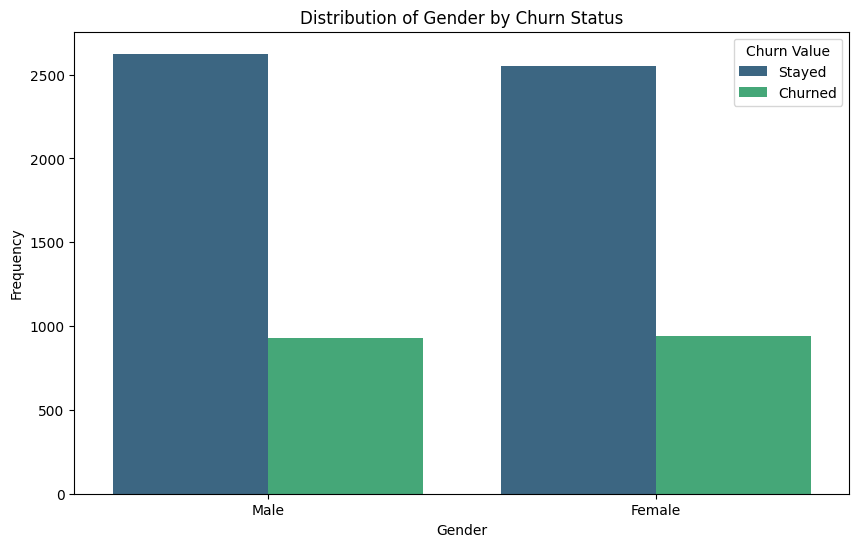

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Churn Value', data=df_Demo_viz, palette='viridis')
plt.title('Distribution of Gender by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Stayed', 'Churned'])
plt.show()

In [107]:
# Create crosstab table
crosstab_table_gender = pd.crosstab(df_Demo_viz['Gender'], df_Demo_viz['Churn Value'])

# Display the table
print(crosstab_table_gender)

Churn Value     0    1
Gender                
Female       2549  939
Male         2625  930


In [108]:
#checking duplicate values to get the sense of the range of data
df_Demo_viz.nunique()

Customer ID             7043
Count                      1
Gender                     2
Age                       62
Under 30                   2
Senior Citizen             2
Married                    2
Dependents                 2
Number of Dependents      10
Churn Value                2
Satisfaction Score         5
dtype: int64

AGE

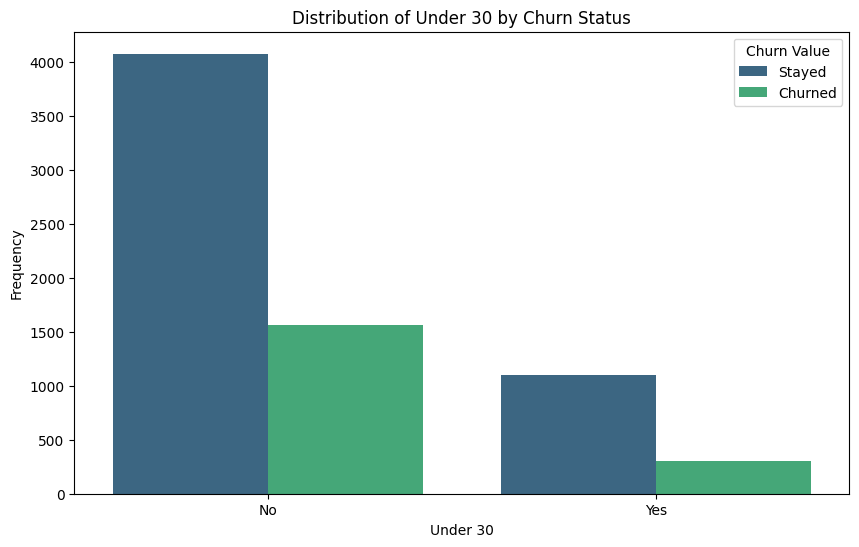

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Under 30', hue='Churn Value', data=df_Demo_viz, palette='viridis')
plt.title('Distribution of Under 30 by Churn Status')
plt.xlabel('Under 30')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Stayed', 'Churned'])
plt.show()

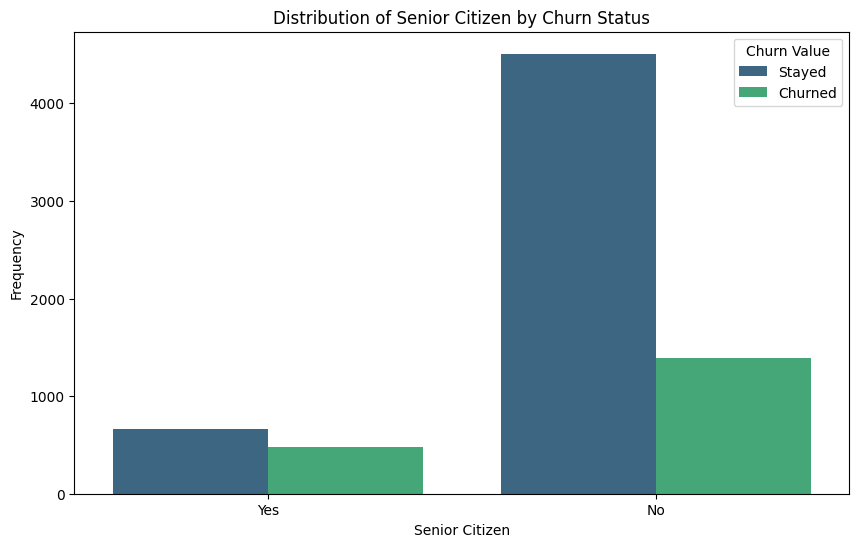

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Senior Citizen', hue='Churn Value', data=df_Demo_viz, palette='viridis')
plt.title('Distribution of Senior Citizen by Churn Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Stayed', 'Churned'])
plt.show()

MARITAL STATUS

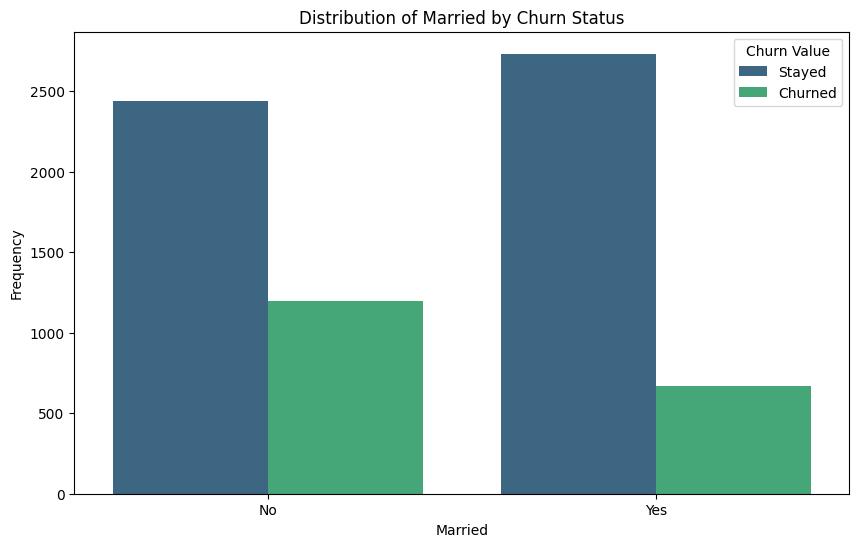

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', hue='Churn Value', data=df_Demo_viz, palette='viridis')
plt.title('Distribution of Married by Churn Status')
plt.xlabel('Married')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Stayed', 'Churned'])
plt.show()

In [112]:
# Create crosstab table
crosstab_table_Married= pd.crosstab(df_Demo_viz['Married'], df_Demo_viz['Churn Value'])

# Display the table
print(crosstab_table_Married)

Churn Value     0     1
Married                
No           2441  1200
Yes          2733   669


DEPENDENTS

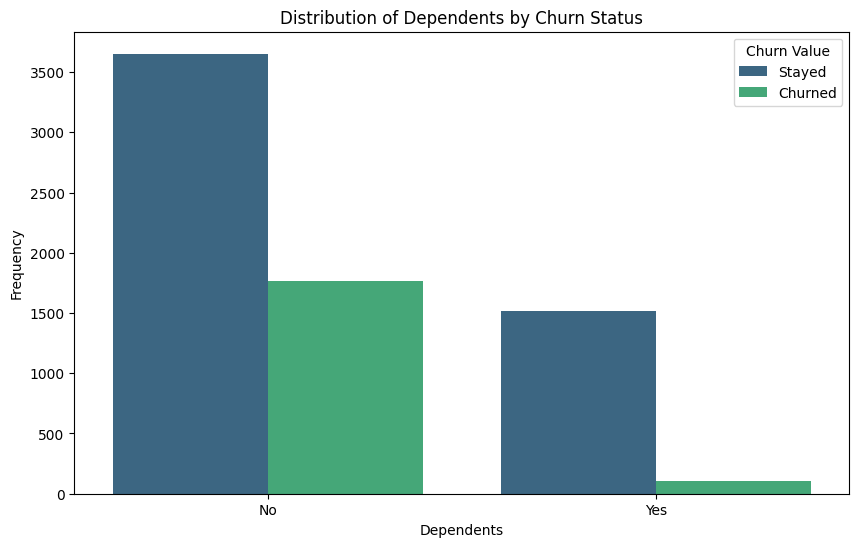

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', hue='Churn Value', data=df_Demo_viz, palette='viridis')
plt.title('Distribution of Dependents by Churn Status')
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Stayed', 'Churned'])
plt.show()

In [114]:
# Create crosstab table
crosstab_table_Dependents= pd.crosstab(df_Demo_viz['Dependents'], df_Demo_viz['Churn Value'])

# Display the table
print(crosstab_table_Dependents)

Churn Value     0     1
Dependents             
No           3653  1763
Yes          1521   106


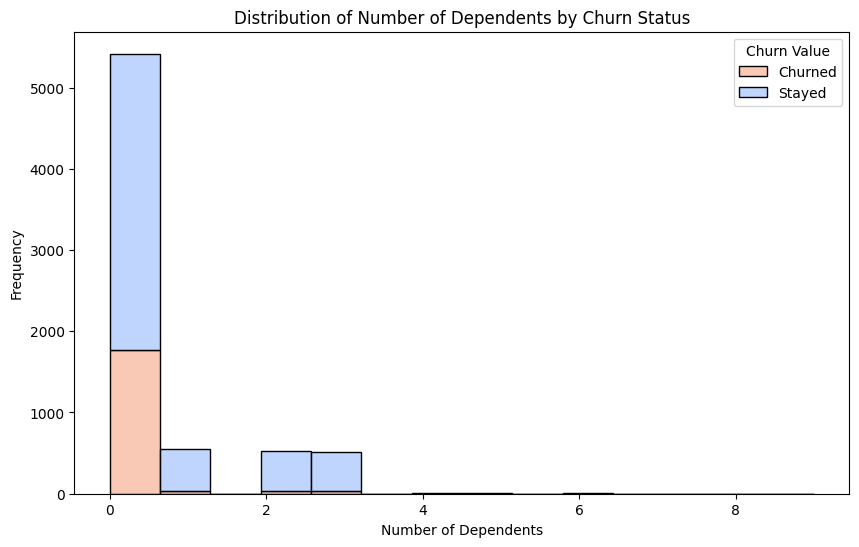

In [115]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_Demo_viz, x='Number of Dependents', hue='Churn Value', multiple='stack', palette='coolwarm')
plt.title('Distribution of Number of Dependents by Churn Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Churned', 'Stayed'])
plt.show()

In [116]:
# Create crosstab table for 'Number of Referrals' vs 'Churn Value'
crosstab_table_Dependents = pd.crosstab(
    index=df_Demo_viz['Number of Dependents'], 
    columns=df_Demo_viz['Churn Value']
)

# Display the table
print(crosstab_table_Dependents)

Churn Value              0     1
Number of Dependents            
0                     3653  1763
1                      515    38
2                      498    33
3                      487    30
4                        8     1
5                        8     2
6                        2     1
7                        1     1
8                        1     0
9                        1     0


#### Services data exploration

In [5]:
# Load the CSV file into a DataFrame
df_Services = pd.read_csv("Telco_data/Telco_customer_churn_services.csv",  sep=";")

# Display the DataFrame 
print(df_Services.head())
print(df_Services.info())

# Check data types
print(df_Services.dtypes)

  Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0  8779-QRDMV      1      Q3                No                    0   
1  7495-OOKFY      1      Q3               Yes                    1   
2  1658-BYGOY      1      Q3                No                    0   
3  4598-XLKNJ      1      Q3               Yes                    1   
4  4846-WHAFZ      1      Q3               Yes                    1   

   Tenure in Months    Offer Phone Service Avg Monthly Long Distance Charges  \
0                 1      NaN            No                                 0   
1                 8  Offer E           Yes                             48,85   
2                18  Offer D           Yes                             11,33   
3                25  Offer C           Yes                             19,76   
4                37  Offer C           Yes                              6,33   

  Multiple Lines  ... Unlimited Data        Contract  Paperless Billing  \
0             No 

 
 8   Avg Monthly Long Distance Charges  7043 non-null   object  
 24  Monthly Charge                     7043 non-null   object  
 25  Total Charges                      7043 non-null   object  
 26  Total Refunds                      7043 non-null   object  
 27  Total Extra Data Charges           7043 non-null   int64  
 28  Total Long Distance Charges        7043 non-null   object  
 29  Total Revenue                      7043 non-null   object  

 8, 24, 25, 26, 28, 29 supposed to be float type 

In [6]:
# Convert entire columns to strings
df_Services['Avg Monthly Long Distance Charges']  = df_Services['Avg Monthly Long Distance Charges'].astype(str)
df_Services['Monthly Charge']  = df_Services['Monthly Charge'].astype(str)
df_Services['Total Charges']  = df_Services['Total Charges'].astype(str)
df_Services['Total Refunds']  = df_Services['Total Refunds'].astype(str)
df_Services['Total Extra Data Charges']  = df_Services['Total Extra Data Charges'].astype(str)
df_Services['Total Long Distance Charges']  = df_Services['Total Long Distance Charges'].astype(str)
df_Services['Total Revenue']  = df_Services['Total Revenue'].astype(str)



# Replace commas with dots and convert to float
df_Services['Avg Monthly Long Distance Charges']  = df_Services['Avg Monthly Long Distance Charges'] .str.replace(',', '.').astype(float)
df_Services['Monthly Charge']  = df_Services['Monthly Charge'].str.replace(',', '.').astype(float)
df_Services['Total Charges']  = df_Services['Total Charges'].str.replace(',', '.').astype(float)
df_Services['Total Refunds']  = df_Services['Total Refunds'].str.replace(',', '.').astype(float)
df_Services['Total Extra Data Charges']  = df_Services['Total Extra Data Charges'].str.replace(',', '.').astype(float)
df_Services['Total Long Distance Charges']  = df_Services['Total Long Distance Charges'].str.replace(',', '.').astype(float)
df_Services['Total Revenue']  = df_Services['Total Revenue'].str.replace(',', '.').astype(float)


# Checking the result
print(df_Services.dtypes)




Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [13]:
# check for missing values
df_Services.isnull().sum()

Customer ID                             0
Count                                   0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

These variables have null values:

Internet Type                        1526  
Offer                                3877  

In order to proceed to data visualization, I need to replace the missing values with some values.


In [8]:
import numpy as np 
print(df_Services['Internet Type'].unique())
print(df_Services['Offer'].unique())


# Change the missing values to 'None'
df_Services['Internet Type'] = df_Services['Internet Type'].replace({np.NaN:'None'}) 
df_Services['Offer'] = df_Services['Offer'].replace({np.NaN:'None'})

# Check if it worked
print(df_Services['Internet Type'].unique())
print(df_Services['Offer'].unique())



['DSL' 'Fiber Optic' 'Cable' 'None']
['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
['DSL' 'Fiber Optic' 'Cable' 'None']
['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']


In [16]:
# Summarize the numerical variables
print(df_Services.describe())

        Count  Number of Referrals  Tenure in Months  \
count  7043.0          7043.000000       7043.000000   
mean      1.0             1.951867         32.386767   
std       0.0             3.001199         24.542061   
min       1.0             0.000000          1.000000   
25%       1.0             0.000000          9.000000   
50%       1.0             0.000000         29.000000   
75%       1.0             3.000000         55.000000   
max       1.0            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%         

In [173]:
numeric_var =['Count' , 'Number of Referrals ', 'Tenure in Months ' ,'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
'Total Refunds', 'Total Extra Data Charges' , 'Total Long Distance Charges', 'Total Revenue'] 
categoric_var = [i for i in df_Services.columns if i not in numeric_var]

In [174]:
# Exploring the categorical variables and their unique values
for i in categoric_var:
    print('Variable :',i)
    print('Unique Values :',df_Services[i].unique())
    print('Number of Unique Values :',df_Services[i].nunique())
    print('\n') 

Variable : Customer ID
Unique Values : ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Number of Unique Values : 7043


Variable : Quarter
Unique Values : ['Q3']
Number of Unique Values : 1


Variable : Referred a Friend
Unique Values : ['No' 'Yes']
Number of Unique Values : 2


Variable : Number of Referrals
Unique Values : [ 0  1  6  2  4  3  7  5  8  9 10 11]
Number of Unique Values : 12


Variable : Tenure in Months
Unique Values : [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]
Number of Unique Values : 72


Variable : Offer
Unique Values : ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Number of Unique Values : 6


Variable : Phone Service
Unique Values : ['No' 'Yes']
Number of Unique Values : 2


Variable : Multiple Lines
Unique Values : ['No' 'Yes']
Number of U

#### Churn status data exploration

In [9]:
# Load the CSV file into a DataFrame
df_Churn_Status = pd.read_csv("Telco_data/Telco_customer_churn_status.csv",  sep=";")

# Display the DataFrame 
print(df_Churn_Status.head())
print(df_Churn_Status.info())

# Check data types
print(df_Churn_Status.dtypes)


  Customer ID  Count Quarter  Satisfaction Score Customer Status Churn Label  \
0  8779-QRDMV      1      Q3                   3         Churned         Yes   
1  7495-OOKFY      1      Q3                   3         Churned         Yes   
2  1658-BYGOY      1      Q3                   2         Churned         Yes   
3  4598-XLKNJ      1      Q3                   2         Churned         Yes   
4  4846-WHAFZ      1      Q3                   2         Churned         Yes   

   Churn Value  Churn Score  CLTV   Churn Category  \
0            1           91  5433       Competitor   
1            1           69  5302       Competitor   
2            1           81  3179       Competitor   
3            1           88  5337  Dissatisfaction   
4            1           67  2793            Price   

                   Churn Reason  
0  Competitor offered more data  
1  Competitor made better offer  
2  Competitor made better offer  
3     Limited range of services  
4            Extra data 

In [177]:
# check for missing values
df_Churn_Status.isnull().sum()

Customer ID              0
Count                    0
Quarter                  0
Satisfaction Score       0
Customer Status          0
Churn Label              0
Churn Value              0
Churn Score              0
CLTV                     0
Churn Category        5174
Churn Reason          5174
dtype: int64

In [178]:
print(df_Churn_Status['Churn Category'].unique())
print(df_Churn_Status['Churn Reason'].unique())

['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]
['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' nan 'Lack of self-service on Website']


These variables have missing values:

Churn Category        5174  
Churn Reason          5174  

These are the customers who stayed at the company, so it makes sense they were not asked for the Churn Category and Reason. I will change them to 'None' and 'No Reason' for data visualization purposes.

In [10]:
# Change the missing values to 'None' and 'No Reason'
df_Churn_Status['Churn Category'] = df_Churn_Status['Churn Category'].replace({np.NaN:'None'}) 
df_Churn_Status['Churn Reason'] = df_Churn_Status['Churn Reason'].replace({np.NaN:'No Reason'})

# Check if it worked
print(df_Churn_Status['Churn Category'].unique())
print(df_Churn_Status['Churn Reason'].unique())

['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' 'None']
['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' 'No Reason' 'Lack of self-service on Website']


In [180]:
# Summarize the numerical variables
print(df_Churn_Status.describe())

        Count  Satisfaction Score  Churn Value  Churn Score         CLTV
count  7043.0         7043.000000  7043.000000  7043.000000  7043.000000
mean      1.0            3.244924     0.265370    58.505040  4400.295755
std       0.0            1.201657     0.441561    21.170031  1183.057152
min       1.0            1.000000     0.000000     5.000000  2003.000000
25%       1.0            3.000000     0.000000    40.000000  3469.000000
50%       1.0            3.000000     0.000000    61.000000  4527.000000
75%       1.0            4.000000     1.000000    75.500000  5380.500000
max       1.0            5.000000     1.000000    96.000000  6500.000000


In [181]:
# Exploring the categorical variables and their unique values
for i in df_Churn_Status:
    print('Variable :',i)
    print('Unique Values :',df_Churn_Status[i].unique())
    print('Number of Unique Values :',df_Churn_Status[i].nunique())
    print('\n') 

Variable : Customer ID
Unique Values : ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Number of Unique Values : 7043


Variable : Count
Unique Values : [1]
Number of Unique Values : 1


Variable : Quarter
Unique Values : ['Q3']
Number of Unique Values : 1


Variable : Satisfaction Score
Unique Values : [3 2 1 4 5]
Number of Unique Values : 5


Variable : Customer Status
Unique Values : ['Churned' 'Stayed' 'Joined']
Number of Unique Values : 3


Variable : Churn Label
Unique Values : ['Yes' 'No']
Number of Unique Values : 2


Variable : Churn Value
Unique Values : [1 0]
Number of Unique Values : 2


Variable : Churn Score
Unique Values : [91 69 81 88 67 95 76 85 86 65 96 84 80 73 83 90 89 87 82 74 66 92 72 70
 94 68 75 93 77 79 71 78 38 40 52 25 59 21 55 60 28  8  7 50 36 23 41 34
 26 56 44 30 62 24 47 22 32 64 27 29 54 39 45 33 58 35 20 31 61 49 37 63
 48 57 42 53 46 43 51  9  5]
Number of Unique Values : 81


Variable : CLTV
Unique Values : [5433 

In [40]:
print(df_Churn_Status.dtypes)

Customer ID           object
Count                  int64
Quarter               object
Satisfaction Score     int64
Customer Status       object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Category        object
Churn Reason          object
dtype: object


## Data Visualizations

### Churn Status

#### Churned VS not churned


In [11]:
# Load the CSV file into a DataFrame
df_Churn_Status = pd.read_csv("Telco_data/Telco_customer_churn_status.csv",  sep=";")

# Display the DataFrame 
print(df_Churn_Status.head())

# Inspect the dataset
print("\nDataframe Info:")
print(df_Churn_Status.info())

  Customer ID  Count Quarter  Satisfaction Score Customer Status Churn Label  \
0  8779-QRDMV      1      Q3                   3         Churned         Yes   
1  7495-OOKFY      1      Q3                   3         Churned         Yes   
2  1658-BYGOY      1      Q3                   2         Churned         Yes   
3  4598-XLKNJ      1      Q3                   2         Churned         Yes   
4  4846-WHAFZ      1      Q3                   2         Churned         Yes   

   Churn Value  Churn Score  CLTV   Churn Category  \
0            1           91  5433       Competitor   
1            1           69  5302       Competitor   
2            1           81  3179       Competitor   
3            1           88  5337  Dissatisfaction   
4            1           67  2793            Price   

                   Churn Reason  
0  Competitor offered more data  
1  Competitor made better offer  
2  Competitor made better offer  
3     Limited range of services  
4            Extra data 

In [42]:
# Count the number of customers who churned and who did not
df_Churn_Status["Churn Value"]
print(df_Churn_Status["Churn Value"].value_counts())

Churn Value
0    5174
1    1869
Name: count, dtype: int64


In [43]:

# Plot the ratio of churned vs not churned customers
main_color = ['#31BA61','#E6F183']
df_t = df_Churn_Status['Churn Value'].value_counts().reset_index().set_axis(['Churn Value','Count'],axis=1)
df_t['Churn Value'] = df_t['Churn Value'].replace({0:'Not Churn',1:'Churn'})
z = [main_color[0],main_color[1]]
fig = go.Figure(data=[go.Pie(labels=df_t['Churn Value'], values=df_t['Count'], hole=.3, domain={'x': [0.0, 0.75], 'y': [0.0, 1.0]})]
            ).update_layout(height=550,title={'text': 'Customer Churn','y':0.96,'x':0.01,'xanchor': 'left','yanchor': 'top'},font=dict( size=15), template='plotly_white', 
              legend=dict(  # Adjust legend positioning to the left
        x=0.01,  # Position the legend on the far left
        xanchor='right',  # Anchor the legend at the left
        y=1,  # Anchor legend at the top
        yanchor='top' ) # Anchor legend at the top              
                            ).update_traces(marker=dict(colors=z))
fig.show()

#### Satisfaction score

C:\Users\Ruta\AppData\Local\Temp\ipykernel_25924\459100933.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




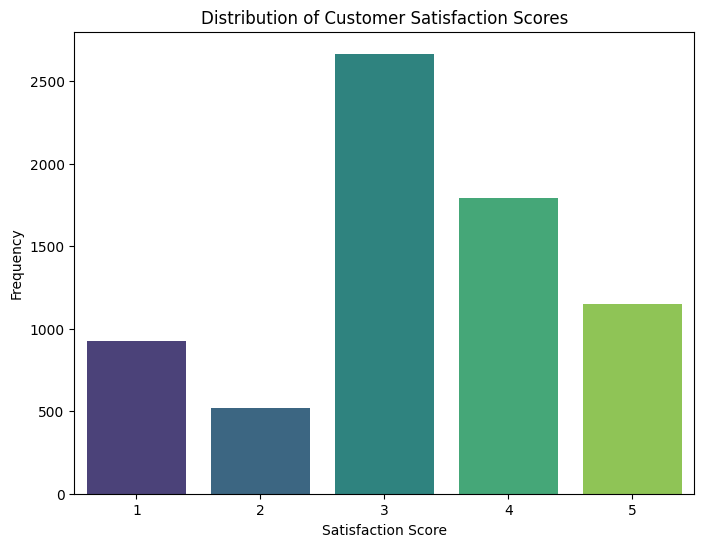

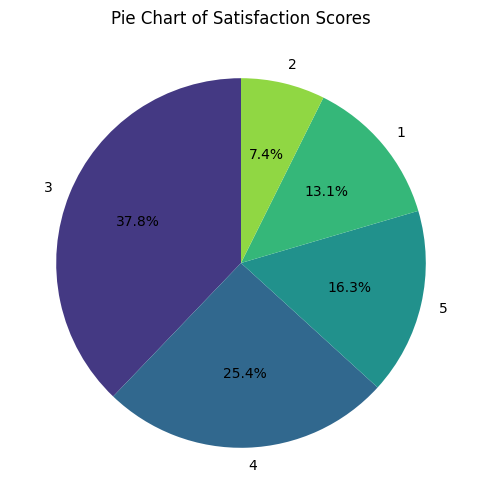

In [20]:
# Ensure 'Satisfaction Score' is treated as a categorical variable
df_Churn_Status['Satisfaction Score'] = df_Churn_Status['Satisfaction Score'].astype('category')

# Plotting Histogram / Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Satisfaction Score', data=df_Churn_Status, palette='viridis')
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()


# Plotting Pie Chart
plt.figure(figsize=(8, 6))
df_Churn_Status['Satisfaction Score'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 5))
plt.title('Pie Chart of Satisfaction Scores')
plt.ylabel('')  # Hide the y-label
plt.show()


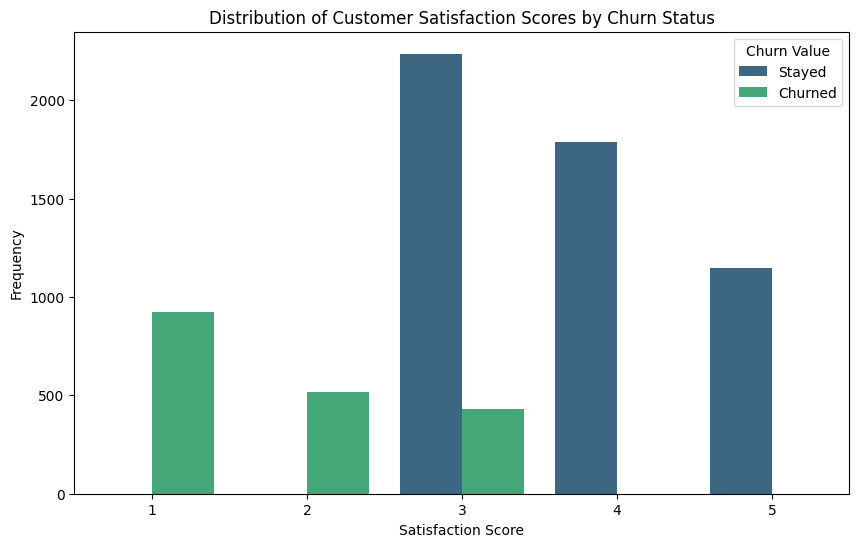

In [45]:
# Plotting Bar Chart dividing into churn and no churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction Score', hue='Churn Value', data=df_Churn_Status, palette='viridis')
plt.title('Distribution of Customer Satisfaction Scores by Churn Status')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Stayed', 'Churned'])

# Show the plot
plt.show()

In [50]:
# Filter the DataFrame to include only those who churned
churned_customers = df_Demo[df_Demo['Churn Value'] == 1]

# Calculate the mode satisfaction score of churned customers
mode_satisfaction_churned = churned_customers['Satisfaction Score'].mode()[0]

# Calculate the distribution of satisfaction scores for churned customers
distribution_satisfaction_churned = churned_customers['Satisfaction Score'].value_counts().sort_index()

print(f"Mode Satisfaction Score of Churned Customers: {mode_satisfaction_churned}")
print(f"Distribution of Satisfaction Scores for Churned Customers:\n{distribution_satisfaction_churned}")


Mode Satisfaction Score of Churned Customers: 1
Distribution of Satisfaction Scores for Churned Customers:
Satisfaction Score
1    922
2    518
3    429
Name: count, dtype: int64


#### Churn category

C:\Users\Ruta\AppData\Local\Temp\ipykernel_30112\1950540652.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




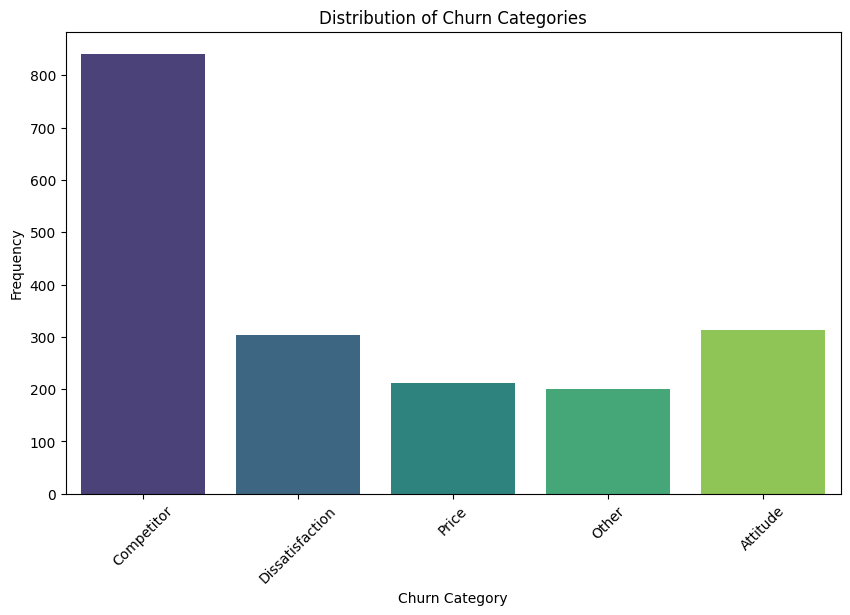

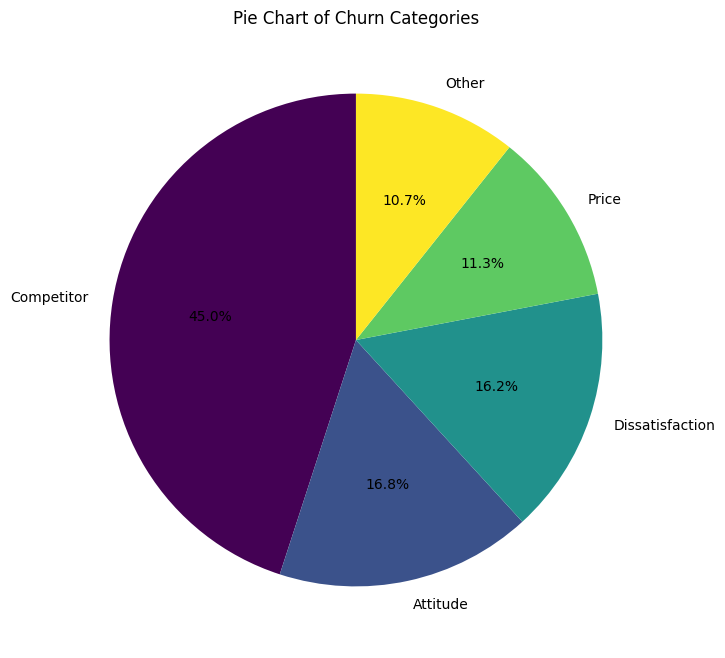

In [51]:
# Plotting Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn Category', data=df_Churn_Status, palette='viridis')
plt.title('Distribution of Churn Categories')
plt.xlabel('Churn Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotating the labels for better readability if needed
plt.show()

# Plotting Pie Chart
plt.figure(figsize=(8, 8))
df_Churn_Status['Churn Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Pie Chart of Churn Categories')
plt.ylabel('')  # Hide the y-label as it's unnecessary for pie charts
plt.show()

#### Churn Reason

C:\Users\Ruta\AppData\Local\Temp\ipykernel_30112\2919843446.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




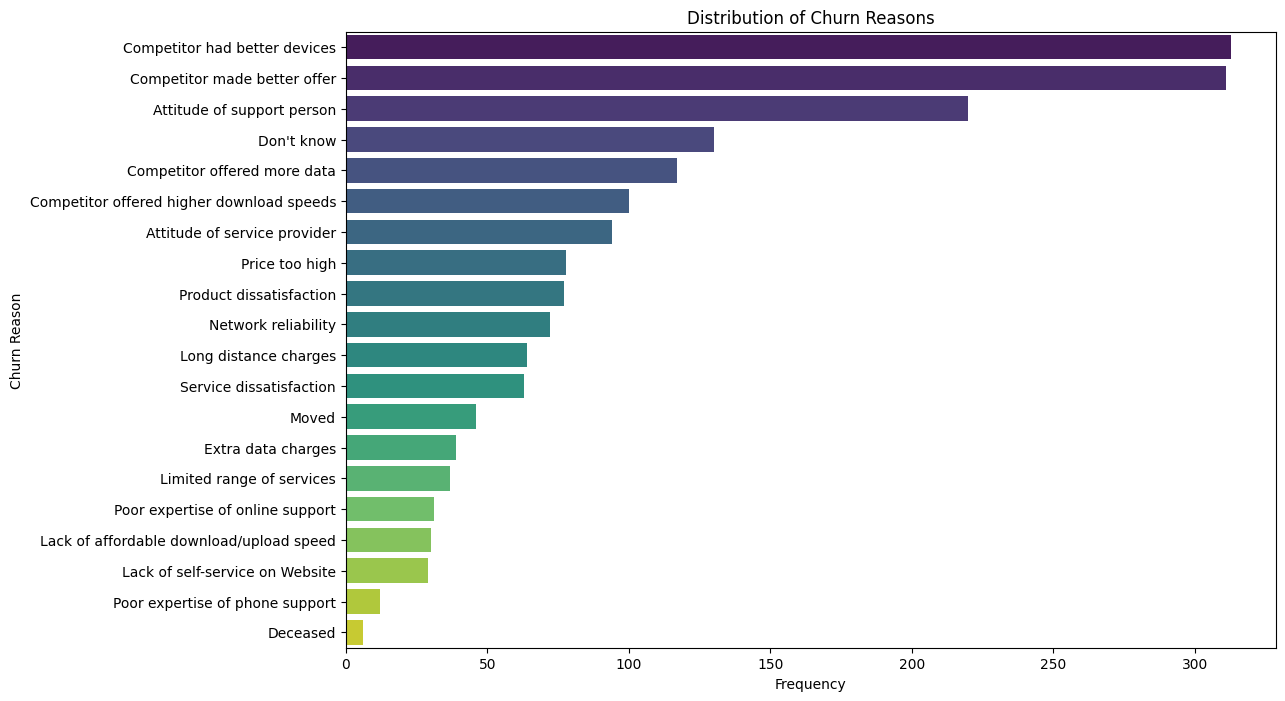

In [52]:
# Plotting Bar Chart
plt.figure(figsize=(12, 8))
sns.countplot(y='Churn Reason', data=df_Churn_Status, palette='viridis', order=df_Churn_Status['Churn Reason'].value_counts().index)
plt.title('Distribution of Churn Reasons')
plt.xlabel('Frequency')
plt.ylabel('Churn Reason')
plt.show()

#### Monetary Value & Churn

In [25]:
print(df_Services)

     Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0     8779-QRDMV      1      Q3                No                    0   
1     7495-OOKFY      1      Q3               Yes                    1   
2     1658-BYGOY      1      Q3                No                    0   
3     4598-XLKNJ      1      Q3               Yes                    1   
4     4846-WHAFZ      1      Q3               Yes                    1   
...          ...    ...     ...               ...                  ...   
7038  2569-WGERO      1      Q3                No                    0   
7039  6840-RESVB      1      Q3               Yes                    1   
7040  2234-XADUH      1      Q3               Yes                    4   
7041  4801-JZAZL      1      Q3               Yes                    1   
7042  3186-AJIEK      1      Q3                No                    0   

      Tenure in Months    Offer Phone Service  \
0                    1     None            No   
1            

In [12]:
# Adding the Churn Value column to the Services dataframe
df_Services_merged = pd.merge(df_Services, df_Churn_Status[['Customer ID', 'Churn Value', 'Satisfaction Score']], on='Customer ID', how='left')
print(df_Services_merged)

     Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0     8779-QRDMV      1      Q3                No                    0   
1     7495-OOKFY      1      Q3               Yes                    1   
2     1658-BYGOY      1      Q3                No                    0   
3     4598-XLKNJ      1      Q3               Yes                    1   
4     4846-WHAFZ      1      Q3               Yes                    1   
...          ...    ...     ...               ...                  ...   
7038  2569-WGERO      1      Q3                No                    0   
7039  6840-RESVB      1      Q3               Yes                    1   
7040  2234-XADUH      1      Q3               Yes                    4   
7041  4801-JZAZL      1      Q3               Yes                    1   
7042  3186-AJIEK      1      Q3                No                    0   

      Tenure in Months    Offer Phone Service  \
0                    1     None            No   
1            

In [13]:
print(df_Services_merged.dtypes)

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [15]:
fig = px.scatter(df_Services_merged[df_Services_merged['Churn Value']==1], x="Tenure in Months", y="Total Revenue", color='Contract',
                 size='Number of Referrals',color_continuous_scale='Spectral').update_layout(template='plotly_white',height=400, title='Churn',title_x=0.5,title_y= 0.97)
fig2 = px.scatter(df_Services_merged[df_Services_merged['Churn Value']==0], x="Tenure in Months", y="Total Revenue", color='Contract',
                 size='Number of Referrals', color_continuous_scale='Spectral').update_layout(template='plotly_white',height=400, title='Not Churn',title_x=0.5,title_y= 0.97)
fig.show()
fig2.show()

Referred a friend

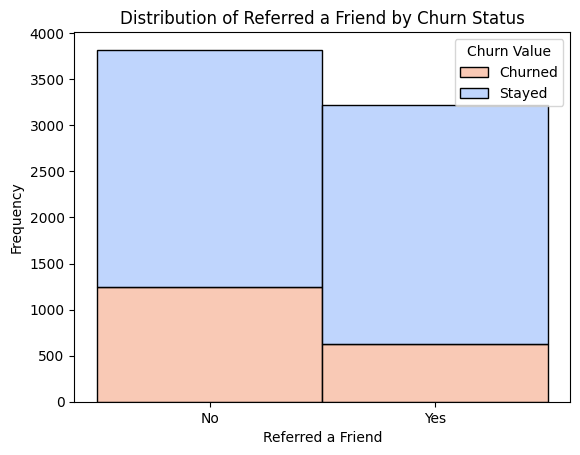

In [56]:
# Using seaborn to create a histogram with KDE overlay for each Churn status group
sns.histplot(data=df_Services_merged, x='Referred a Friend', hue='Churn Value', multiple='stack', palette='coolwarm')
plt.title('Distribution of Referred a Friend by Churn Status')
plt.xlabel('Referred a Friend')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Churned', 'Stayed'])

# Show the plot
plt.show()

In [57]:
# Create crosstab table
crosstab_table_refferal_status_churn = pd.crosstab(df_Services_merged['Referred a Friend'], df_Services_merged['Churn Value'])

# Display the table
print(crosstab_table_refferal_status_churn)

Churn Value           0     1
Referred a Friend            
No                 2576  1245
Yes                2598   624


C:\Users\Ruta\AppData\Local\Temp\ipykernel_25924\3310164509.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




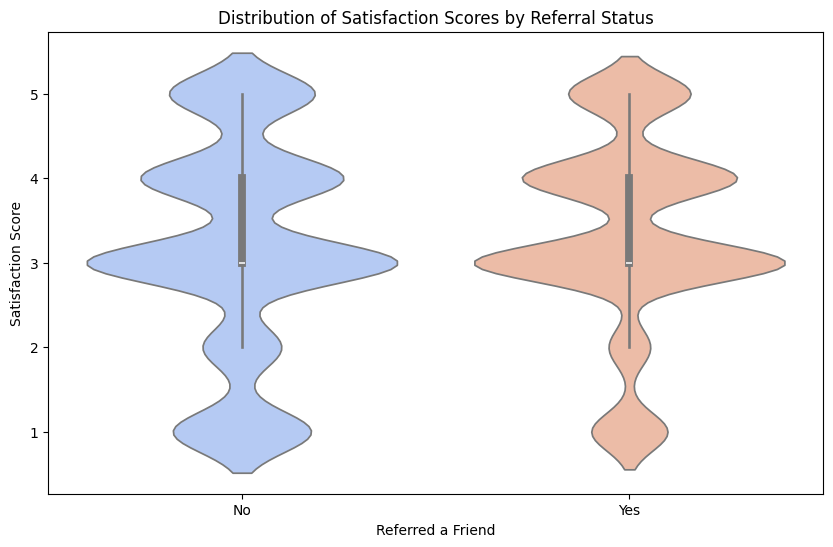

In [34]:
# Adding the Satisfaction score column to the Services dataframe
##df_Services_merged = pd.merge(df_Services_merged, df_Churn_Status[['Customer ID', 'Satisfaction Score']], on='Customer ID', how='left')


# Violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_Services_merged, x='Referred a Friend', y='Satisfaction Score', palette='coolwarm')
plt.title('Distribution of Satisfaction Scores by Referral Status')
plt.xlabel('Referred a Friend')
plt.ylabel('Satisfaction Score')
plt.show()

In [59]:
# Create crosstab table
crosstab_table_refferal_status = pd.crosstab(df_Services_merged['Referred a Friend'], df_Services_merged['Satisfaction Score'])

# Display the table
print(crosstab_table_refferal_status)

Satisfaction Score    1    2     3    4    5
Referred a Friend                           
No                  602  343  1356  885  635
Yes                 320  175  1309  904  514


Number of Referrals

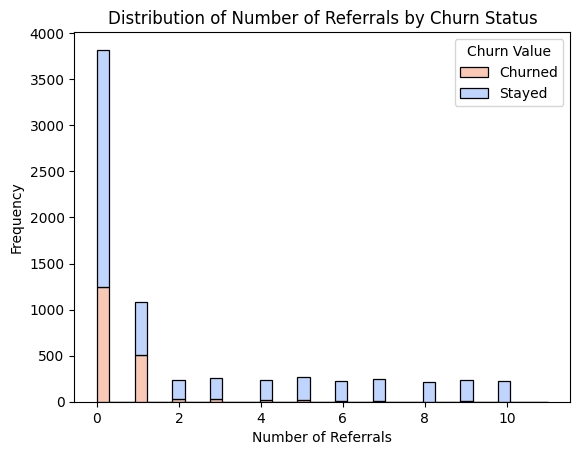

In [60]:
# Using seaborn to create a histogram for each Churn status group
sns.histplot(data=df_Services_merged, x='Number of Referrals', hue='Churn Value', multiple='stack', palette='coolwarm')
plt.title('Distribution of Number of Referrals by Churn Status')
plt.xlabel('Number of Referrals')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Churned', 'Stayed'])

# Show the plot
plt.show()

In [61]:
# Create crosstab table for 'Number of Referrals' vs 'Churn Value'
crosstab_table_referrals_by_churn = pd.crosstab(
    index=df_Services_merged['Number of Referrals'], 
    columns=df_Services_merged['Churn Value']
)

# Display the table
print(crosstab_table_referrals_by_churn)

Churn Value             0     1
Number of Referrals            
0                    2576  1245
1                     579   507
2                     210    26
3                     223    32
4                     218    18
5                     243    21
6                     213     8
7                     242     6
8                     211     2
9                     234     4
10                    223     0
11                      2     0


In [62]:
# Create crosstab table
crosstab_table_refferal_status_by_churn = pd.crosstab(df_Services_merged['Referred a Friend'], df_Services_merged['Churn Value'])

# Display the table
print(crosstab_table_refferal_status_by_churn)

Churn Value           0     1
Referred a Friend            
No                 2576  1245
Yes                2598   624


Tenure in Months

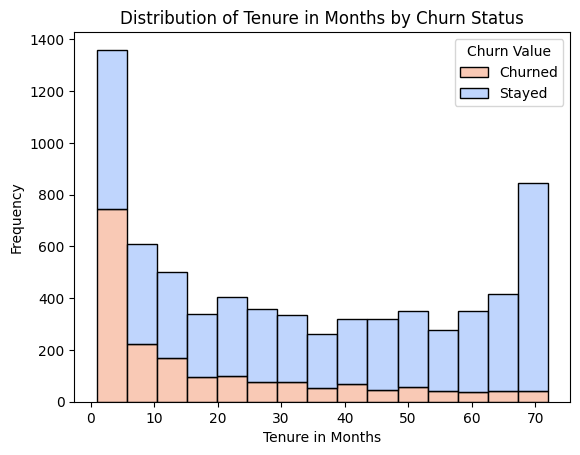

In [63]:
# Using seaborn to create a histogram for each Churn status group
sns.histplot(data=df_Services_merged, x='Tenure in Months', hue='Churn Value', multiple='stack', palette='coolwarm')
plt.title('Distribution of Tenure in Months by Churn Status')
plt.xlabel('Tenure in Months')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Churned', 'Stayed'])

# Show the plot
plt.show()

In [64]:
# Create crosstab table for 'Number of Referrals' vs 'Churn Value'
crosstab_table_tenure_by_churn = pd.crosstab(
    index=df_Services_merged['Tenure in Months'], 
    columns=df_Services_merged['Churn Value']
)

# Display the table
print(crosstab_table_tenure_by_churn)

Churn Value         0    1
Tenure in Months          
1                 233  380
2                 115  123
3                 106   94
4                  93   83
5                  69   64
...               ...  ...
68                 91    9
69                 87    8
70                108   11
71                164    6
72                356    6

[72 rows x 2 columns]


Contract type

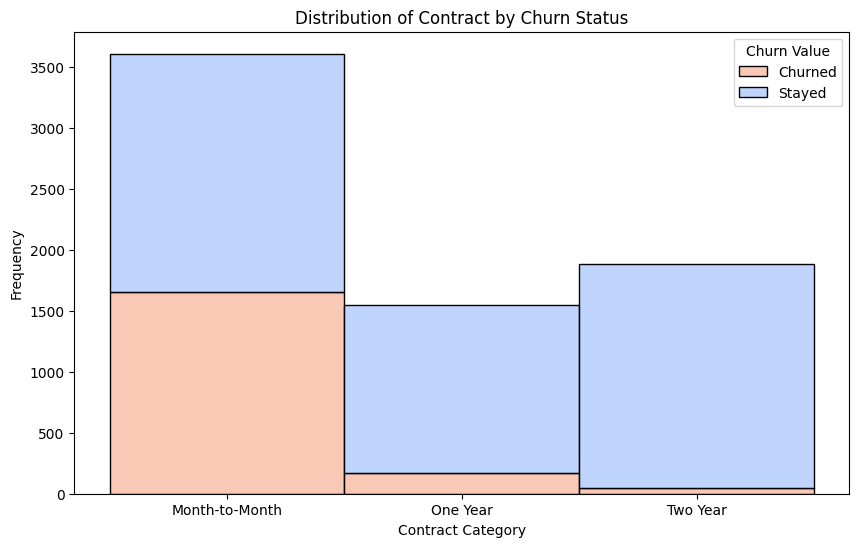

In [65]:
# Plot the histogram for each contract category divided by churn and non-churn status
plt.figure(figsize=(10, 6))
sns.histplot(data=df_Services_merged, x='Contract', hue='Churn Value', multiple='stack', palette='coolwarm')
plt.title('Distribution of Contract by Churn Status')
plt.xlabel('Contract Category')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Churned', 'Stayed'])

# Show the plot
plt.show()

In [57]:
# Create crosstab table for 'Number of Referrals' vs 'Churn Value'
crosstab_table_tenure_by_churn = pd.crosstab(
    index=df_Services_merged['Contract'], 
    columns=df_Services_merged['Churn Value']
)

# Display the table
print(crosstab_table_tenure_by_churn)

Churn Value        0     1
Contract                  
Month-to-Month  1955  1655
One Year        1384   166
Two Year        1835    48


Marketing Offer

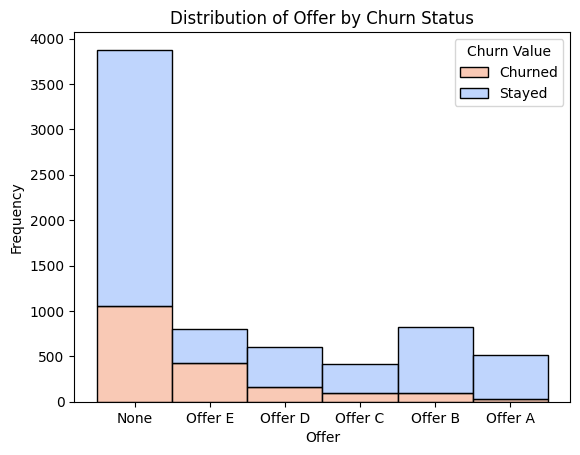

In [66]:
# Using seaborn to create a histogram for each Churn status group
sns.histplot(data=df_Services_merged, x='Offer', hue='Churn Value', multiple='stack', palette='coolwarm')
plt.title('Distribution of Offer by Churn Status')
plt.xlabel('Offer')
plt.ylabel('Frequency')
plt.legend(title='Churn Value', labels=['Churned', 'Stayed'])

# Show the plot
plt.show()


Services

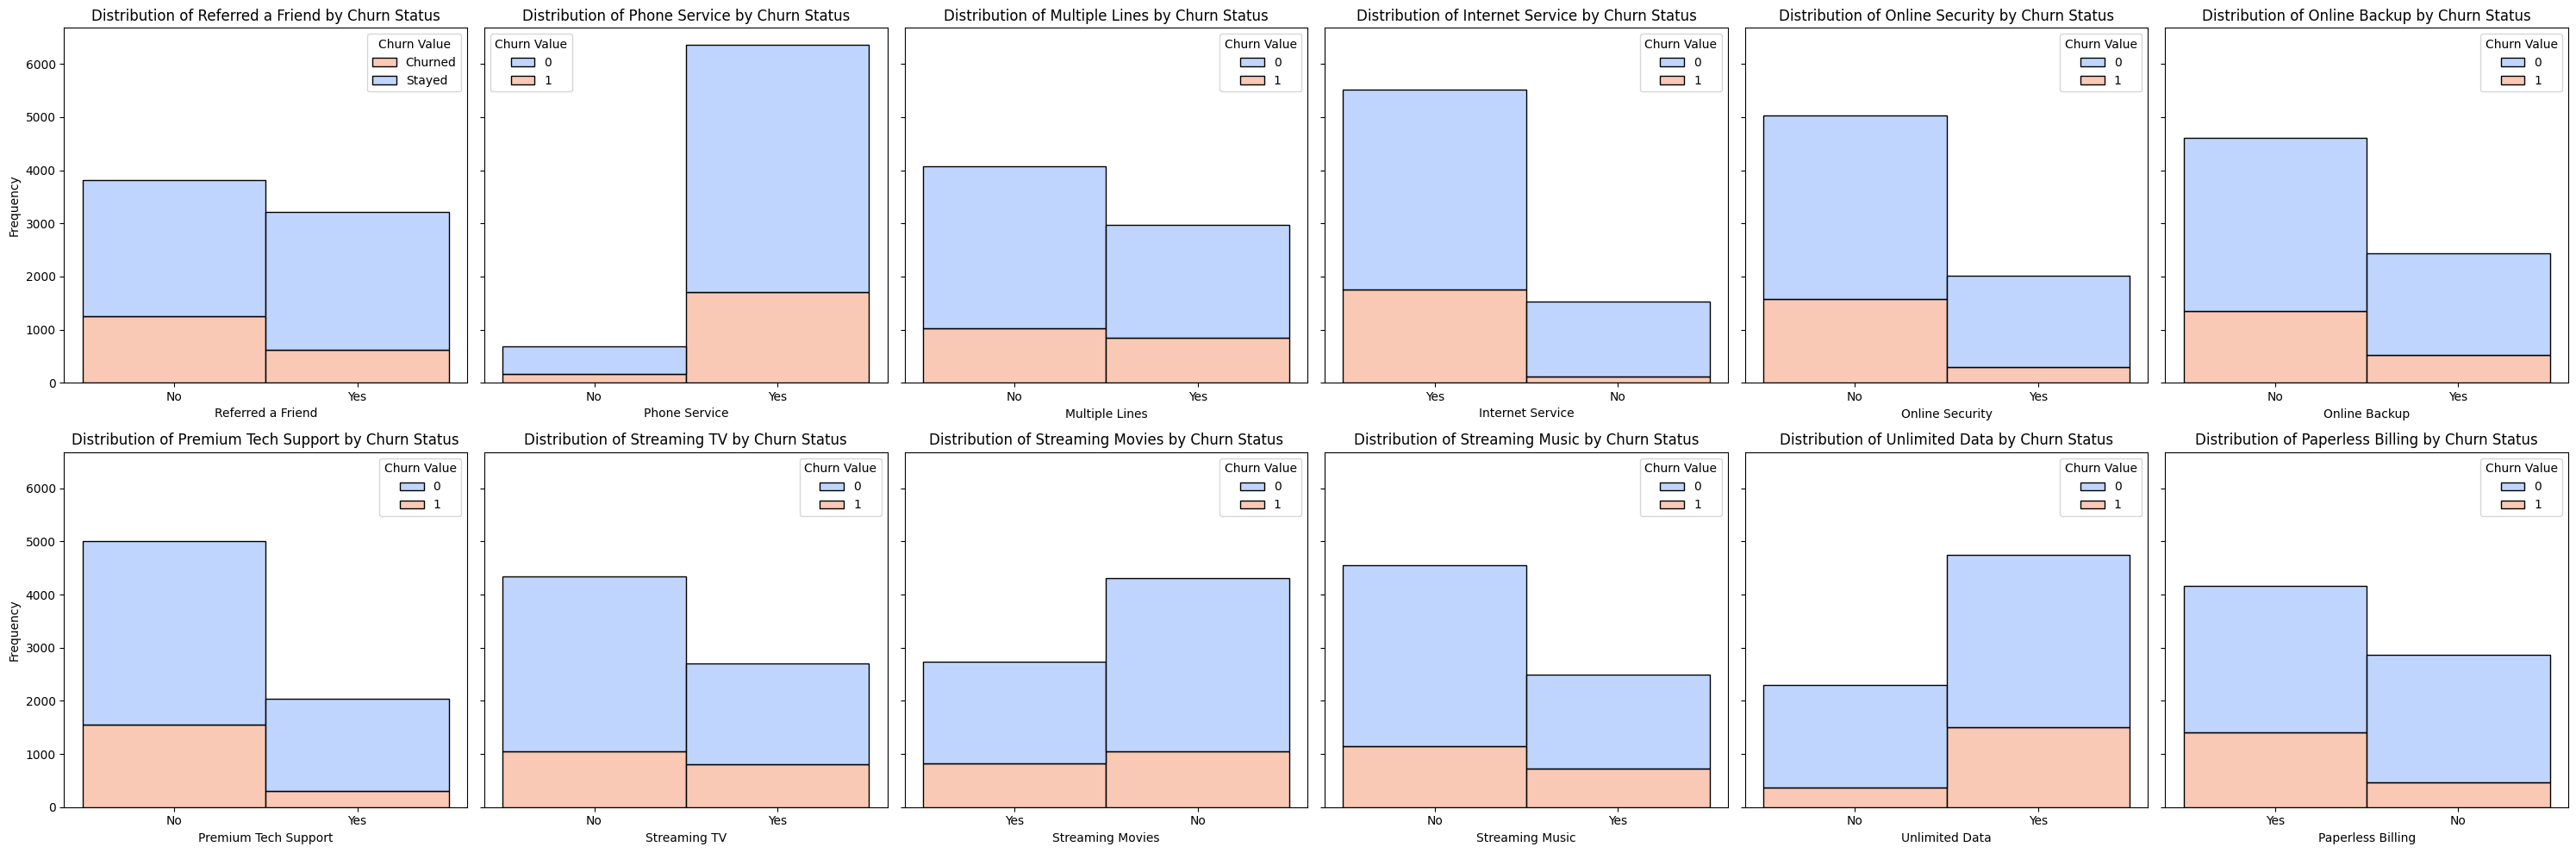

In [69]:
# Variables to plot
variables = ['Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',  'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing']
n_vars = len(variables)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 6, figsize=(30, 10), sharey=True)  # 2 rows, 6 columns
# Flatten axes for easy iteration
axes = axes.flatten()

for i, var in enumerate(variables):
    # Create histogram for each variable
    sns.histplot(data=df_Services_merged, x=var, hue='Churn Value', multiple='stack', palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Distribution of {var} by Churn Status')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    if i == 0:  # Only add the legend to the first plot to avoid repetition
        axes[i].legend(title='Churn Value', labels=['Churned', 'Stayed'])

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

Services by usage

In [70]:
variables_serv = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',  'Premium Tech Support',
                  'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',  'Device Protection Plan', 'Paperless Billing']


# Count the 'Yes' occurrences for each variable
counts = df_Services_merged[variables_serv].apply(lambda x: (x == 'Yes').sum()).sort_values(ascending=False)

# Create DataFrame for plotting
df_serv = pd.DataFrame({'Services': counts.index, 'Count': counts.values})

# Define colors
#main_color = ['#26577C', '#E55604']
#df_serv['Color'] = main_color[0]
#df_serv.loc[:2, 'Color'] = main_color[1]  # highlight top 3 columns with different color

# Use seaborn to get the 'coolwarm' color palette and reverse it
palette = sns.color_palette("coolwarm", len(df_serv))[::-1]

# Assign colors from the palette to the DataFrame
df_serv['Color'] = [f'rgba({int(color[0]*255)},{int(color[1]*255)},{int(color[2]*255)},0.8)' for color in palette]

# Create the plot
fig = go.Figure([go.Bar(
    y=df_serv['Services'], 
    x=df_serv['Count'],
    text=[f'{count} ({percentage:.2f}%)' for count, percentage in zip(df_serv['Count'], (df_serv['Count'] / df_serv['Count'].sum()) * 100)],
    textposition='outside',
    marker={'color': df_serv['Color']},
    orientation='h'
)])

fig.update_layout(
    autosize=True,
    height=500,
    margin=dict(l=10, r=10, b=10, t=40, pad=0),
    xaxis_range=[0, df_serv['Count'].max() + (df_serv['Count'].max() / 2)],
    template='plotly_white',
    title=dict(text='Count of Services Usage', font=dict(size=20), x=0.5),
    yaxis={'categoryorder': 'array', 'categoryarray': df_serv.sort_values(by='Count', ascending=True)['Services'].to_list()}
)

fig.show()

Services by usage in Churn/No Churn categories

In [71]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

# Define the service variables
variables_serv = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
                  'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 
                  'Unlimited Data', 'Device Protection Plan', 'Paperless Billing']

# Count the 'Yes' occurrences for each variable separated by Churn Value
counts_churn = df_Services_merged[df_Services_merged['Churn Value'] == 1][variables_serv].apply(lambda x: (x == 'Yes').sum())
counts_no_churn = df_Services_merged[df_Services_merged['Churn Value'] == 0][variables_serv].apply(lambda x: (x == 'Yes').sum())

# Create DataFrame for plotting
df_serv_churn = pd.DataFrame({'Services': counts_churn.index, 'Count': counts_churn.values, 'Churn': 'Yes'})
df_serv_no_churn = pd.DataFrame({'Services': counts_no_churn.index, 'Count': counts_no_churn.values, 'Churn': 'No'})

# Combine both DataFrames
df_serv_combined = pd.concat([df_serv_churn, df_serv_no_churn])

# Create the plot
fig = go.Figure()

# Add bars for No Churn
fig.add_trace(go.Bar(
    y=df_serv_combined[df_serv_combined['Churn'] == 'No']['Services'], 
    x=df_serv_combined[df_serv_combined['Churn'] == 'No']['Count'],
    name='No Churn',
    orientation='h'
))

# Add bars for Churn
fig.add_trace(go.Bar(
    y=df_serv_combined[df_serv_combined['Churn'] == 'Yes']['Services'], 
    x=df_serv_combined[df_serv_combined['Churn'] == 'Yes']['Count'],
    name='Churn',
    orientation='h'
))

fig.update_layout(
    barmode='stack',
    autosize=True,
    height=500,
    margin=dict(l=10, r=10, b=10, t=40, pad=0),
    xaxis_range=[0, df_serv_combined['Count'].max() + (df_serv_combined['Count'].max() / 2)],
    template='plotly_white',
    title=dict(text='Count of Services Usage by Churn Status', font=dict(size=20), x=0.5),
    yaxis={'categoryorder': 'total ascending'}
)

fig.show()


## Statistical analyses

#### Satisfaction score and Churn value: correlation matrix

It seems that the satisfaction score and churn value are negatively correlated

In [72]:
# Check data types
print(df_Churn_Status.dtypes)

Customer ID             object
Count                    int64
Quarter                 object
Satisfaction Score    category
Customer Status         object
Churn Label             object
Churn Value              int64
Churn Score              int64
CLTV                     int64
Churn Category          object
Churn Reason            object
dtype: object


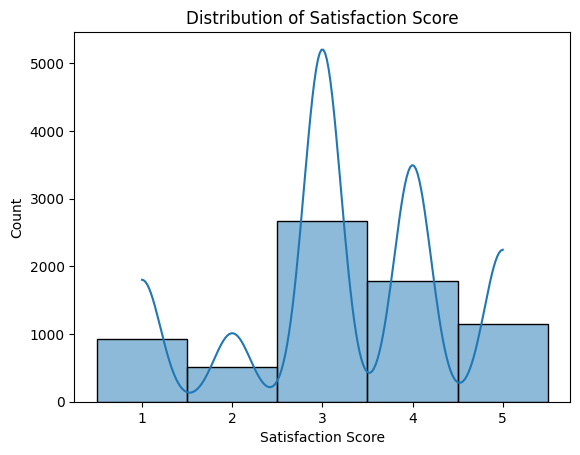

In [73]:
# Check distribution of 'Satisfaction Score'
sns.histplot(df_Churn_Status['Satisfaction Score'], kde=True)
plt.title('Distribution of Satisfaction Score')
plt.show()


Pearson's correlation is used if a linear relationship is assumed which treats "Satisfaction Score" as interval data, or Spearman's correlation if the ordinal nature of the satisfaction scores is more relevant. Satisfaction scores are usually treated as ordinal variables, therefore I will conduct Spearman´s correlation.

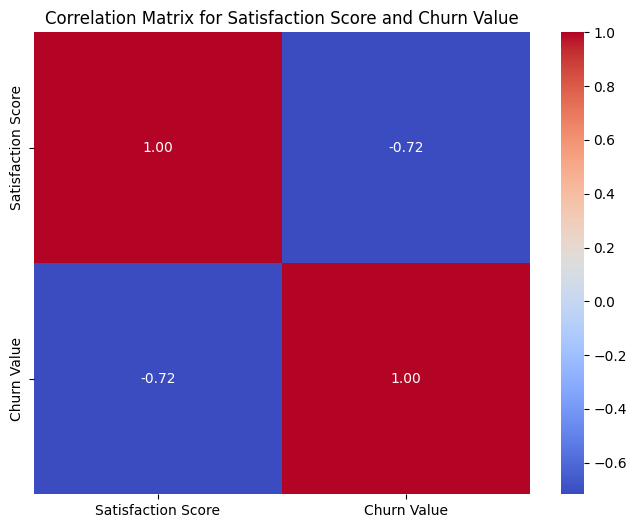

In [74]:
# Calculate the correlation matrix
relevant_columns = ['Satisfaction Score', 'Churn Value']
correlation_matrix = df_Churn_Status[relevant_columns].corr( method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Satisfaction Score and Churn Value')
plt.show()

In [54]:
import scipy
spearman_corr = df_Churn_Status['Satisfaction Score'].corr(df_Churn_Status['Churn Value'], method='spearman')
print(f"Spearman Correlation between Satisfaction Score and Churn Value: {spearman_corr}")

Spearman Correlation between Satisfaction Score and Churn Value: -0.7172652074308467


In [55]:
pearson_corr = df_Churn_Status['Satisfaction Score'].corr(df_Churn_Status['Churn Value'], method='pearson')
print(f"Pearson Correlation between Satisfaction Score and Churn Value: {pearson_corr}")


Pearson Correlation between Satisfaction Score and Churn Value: -0.7546490292381505


Also, calculating Cramér's V for the realtionship between Churn Value and Satisfaction Score: 0.858

In [75]:
from scipy.stats import chi2_contingency


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Calculate Cramér's V
cramers_v_result = cramers_v(df_Churn_Status['Satisfaction Score'], df_Churn_Status['Churn Value'])
print("Cramér's V:", cramers_v_result)

Cramér's V: 0.858710830427801


The Cramer´s V value indicates a strong relationship between the two variables.

In [78]:
# Create a pivot table
pivot_table = df_Churn_Status.pivot_table(index='Satisfaction Score', columns='Churn Value', aggfunc='size', fill_value=0)

# Rename the columns
pivot_table.columns = ['Stayed', 'Churned']

# Display the pivot table
print(pivot_table)

                    Stayed  Churned
Satisfaction Score                 
1                        0      922
2                        0      518
3                     2236      429
4                     1789        0
5                     1149        0


C:\Users\Ruta\AppData\Local\Temp\ipykernel_30112\232416077.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [79]:
def churn_category_report(var,unique_val):
    filter_ = (df_Demo[var] == unique_val) & (df_Churn_Status['Churn Value']==1)
    count = df_Churn_Status[filter_]['Churn Category'].value_counts().to_frame()
    percentage = df_Churn_Status[filter_]['Churn Category'].value_counts(normalize=True).to_frame().round(2)
    frame = pd.concat([count,percentage],axis=1).reset_index().set_axis(["Churn Category",'Count','%'],axis=1)
    return frame


display( 
    churn_category_report('Married','No'),
    churn_category_report('Dependents','No')
    )

,Churn Category,Count,%
0,Competitor,542,0.45
1,Attitude,206,0.17
2,Dissatisfaction,181,0.15
3,Price,143,0.12
4,Other,128,0.11


,Churn Category,Count,%
0,Competitor,807,0.46
1,Attitude,293,0.17
2,Dissatisfaction,279,0.16
3,Price,195,0.11
4,Other,189,0.11


In [80]:
def churn_reason_report(var,unique_val):
    filter_ = (df_Demo[var] == unique_val) & (df_Churn_Status['Churn Value']==1)
    count = df_Churn_Status[filter_]['Churn Reason'].value_counts().to_frame()
    percentage = df_Churn_Status[filter_]['Churn Reason'].value_counts(normalize=True).to_frame().round(2)
    frame = pd.concat([count,percentage],axis=1).reset_index().set_axis(["Churn Reason",'Count','%'],axis=1)
    return frame


display( 
    churn_reason_report('Married','No'),
    churn_reason_report('Dependents','No')
    )

,Churn Reason,Count,%
0,Competitor made better offer,209,0.17
1,Competitor had better devices,199,0.17
2,Attitude of support person,147,0.12
3,Don't know,85,0.07
4,Competitor offered higher download speeds,67,0.06
5,Competitor offered more data,67,0.06
6,Attitude of service provider,59,0.05
7,Price too high,52,0.04
8,Long distance charges,47,0.04
9,Network reliability,46,0.04


,Churn Reason,Count,%
0,Competitor made better offer,300,0.17
1,Competitor had better devices,297,0.17
2,Attitude of support person,206,0.12
3,Don't know,125,0.07
4,Competitor offered more data,114,0.06
5,Competitor offered higher download speeds,96,0.05
6,Attitude of service provider,87,0.05
7,Price too high,73,0.04
8,Product dissatisfaction,72,0.04
9,Network reliability,67,0.04


#### Investigating relationships between other Churn Scores and Churn Value



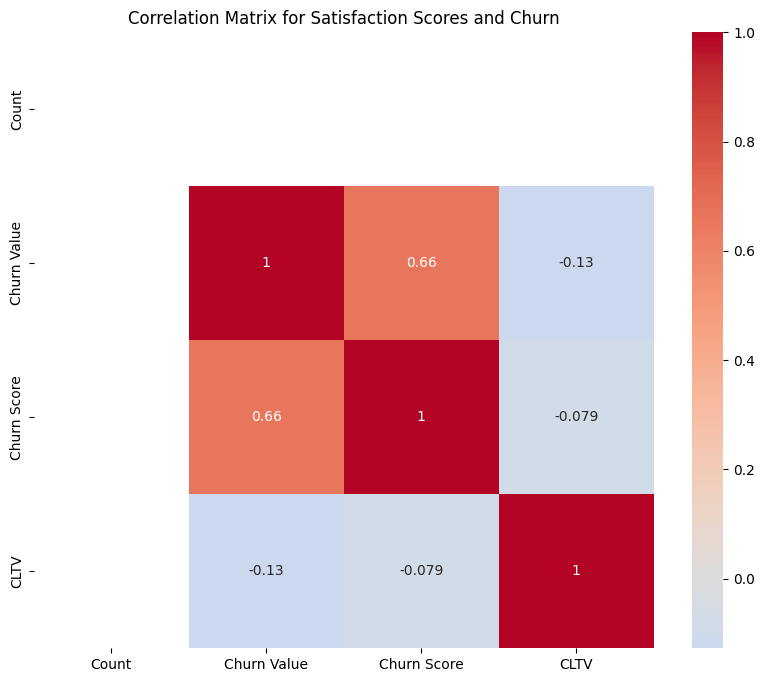

In [81]:
# Converting 'Satisfaction Score' to dummy variables
satisfaction_dummies = pd.get_dummies(df_Churn_Status['Satisfaction Score'], prefix='Satisfaction')
df_extended = pd.concat([df_Churn_Status, satisfaction_dummies], axis=1)

# Select numeric columns only
numeric_cols = df_extended.select_dtypes(include=['number'])  # This selects only numeric columns

# Calculate the correlation matrix on numeric columns only
corr_matrix = numeric_cols.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Satisfaction Scores and Churn')
plt.show()

This matrix above uses Pearson´s corr, therefore to evaluate the relationship between two categorical variables, namely, Churn Value and Satisfaction Score, see above.

In order to investigate the relationship between a categorical (Churn Value) and continuous (Churn Score) variables a point-biserial correlation was conducted.

In [82]:
from scipy.stats import pointbiserialr
# Calculate the point-biserial correlation
correlation, p_value = pointbiserialr(df_Churn_Status['Churn Score'], df_Churn_Status['Churn Value'])
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.6607719192413178
P-value: 0.0


The corr value indicates a strong positive correlation between the churn score and churn value. This means that as the churn score increases, the likelihood of the churn value being 1 (indicating churn) also increases. P-value indicates that the correlation is statistically significant at common alpha levels 

#### Corelation Matrix for continuous variables


In [89]:
variables_cont =['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download',
              'Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue'] 

In [94]:
df_Demo.dtypes

Customer ID             object
Count                    int64
Gender                  object
Age                      int64
Under 30                object
Senior Citizen          object
Married                 object
Dependents              object
Number of Dependents     int64
Churn Value              int64
Satisfaction Score       int64
dtype: object

In [95]:
df = df_Services_merged

# Merge DataFrames on the index, specifying only the columns to add
df = pd.merge(df, df_Demo[['Age', 'Number of Dependents']], left_index=True, right_index=True)

print(df)

     Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0     8779-QRDMV      1      Q3                No                    0   
1     7495-OOKFY      1      Q3               Yes                    1   
2     1658-BYGOY      1      Q3                No                    0   
3     4598-XLKNJ      1      Q3               Yes                    1   
4     4846-WHAFZ      1      Q3               Yes                    1   
...          ...    ...     ...               ...                  ...   
7038  2569-WGERO      1      Q3                No                    0   
7039  6840-RESVB      1      Q3               Yes                    1   
7040  2234-XADUH      1      Q3               Yes                    4   
7041  4801-JZAZL      1      Q3               Yes                    1   
7042  3186-AJIEK      1      Q3                No                    0   

      Tenure in Months    Offer Phone Service  \
0                    1     None            No   
1            

In [96]:
df.dtypes

Customer ID                            object
Count                                   int64
Quarter                                object
Referred a Friend                      object
Number of Referrals                     int64
Tenure in Months                        int64
Offer                                  object
Phone Service                          object
Avg Monthly Long Distance Charges     float64
Multiple Lines                         object
Internet Service                       object
Internet Type                          object
Avg Monthly GB Download                 int64
Online Security                        object
Online Backup                          object
Device Protection Plan                 object
Premium Tech Support                   object
Streaming TV                           object
Streaming Movies                       object
Streaming Music                        object
Unlimited Data                         object
Contract                          

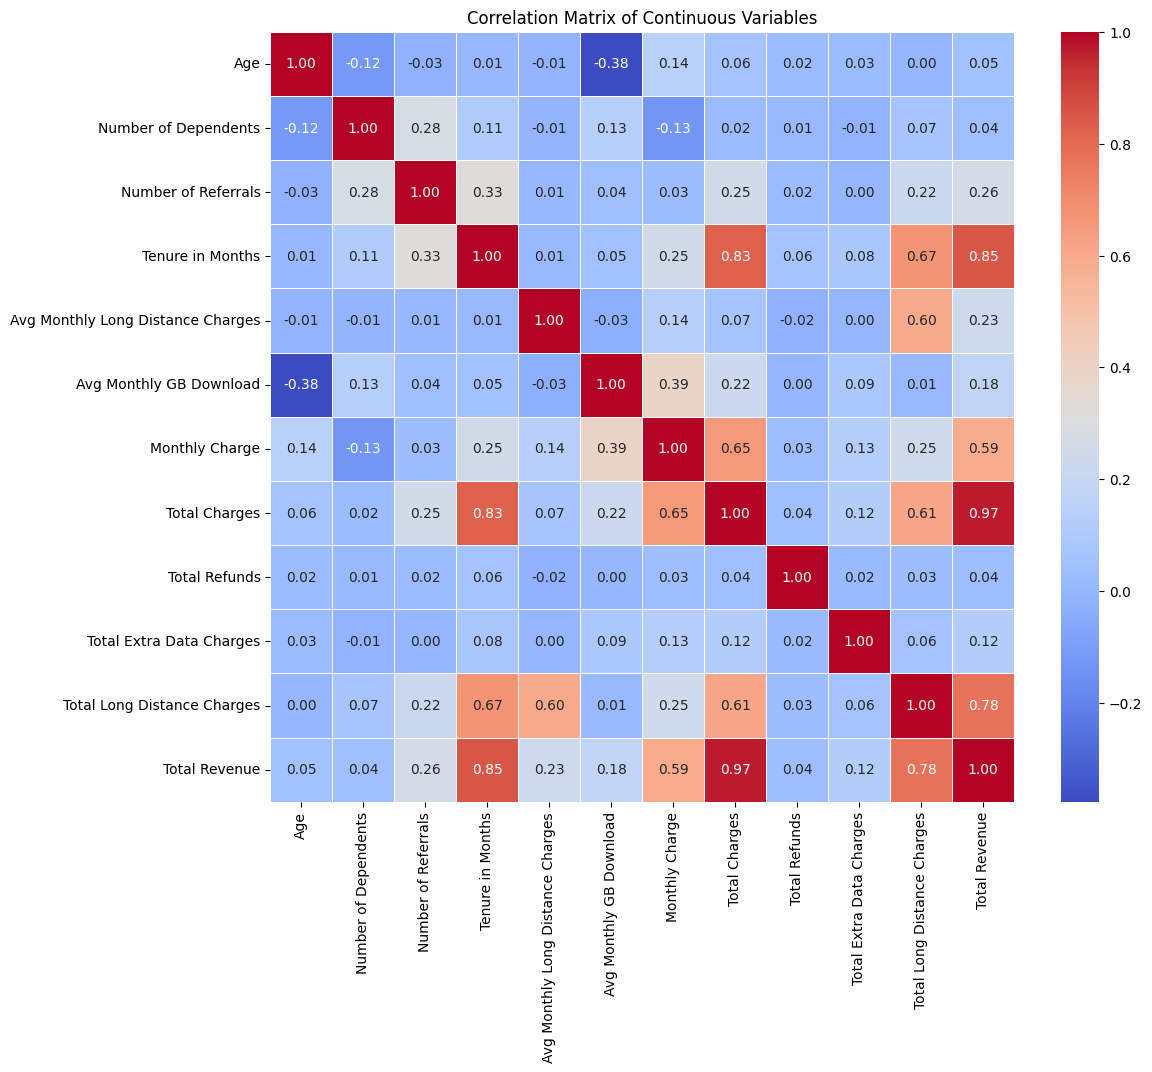

In [97]:
# Calculate the correlation matrix
correlation_matrix = df[variables_cont].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

#### Services and Churn value: correlation matrix

The Phi Coefficient is a measure of association for two binary variables. It is similar to Pearson's correlation coefficient but specifically designed for binary data.

Interpreting the Phi Coefficient:

Positive Correlation: Indicates that as one variable changes from 0 to 1 (No to Yes), the other variable is also more likely to change from 0 to 1 (No to Yes).
Negative Correlation: Indicates that as one variable changes from 0 to 1 (No to Yes), the other variable is more likely to remain 0 (No) or vice versa.

Phi Coefficient provides meaningful directionality even for binary variables but in a more simplified form compared to continuous variables. The relationship is either towards having the same states (positive) or opposite states (negative).



C:\Users\Ruta\AppData\Local\Temp\ipykernel_30112\2539768314.py:16: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



                        Referred a Friend  Phone Service  Multiple Lines  \
Referred a Friend                0.999714       0.014936        0.132352   
Phone Service                    0.014936       0.999188        0.279204   
Multiple Lines                   0.132352       0.279204        0.999709   
Internet Service                 0.002496       0.171626        0.210215   
Online Security                  0.139195       0.092362        0.097790   
Online Backup                    0.142877       0.051807        0.201935   
Premium Tech Support             0.121458       0.095811        0.100255   
Streaming TV                     0.119589       0.022080        0.256856   
Streaming Movies                 0.115035       0.032466        0.258456   
Streaming Music                  0.089619       0.038750        0.193062   
Unlimited Data                   0.018710       0.121883        0.159362   
Paperless Billing                0.010805       0.016016        0.163238   
Device Prote

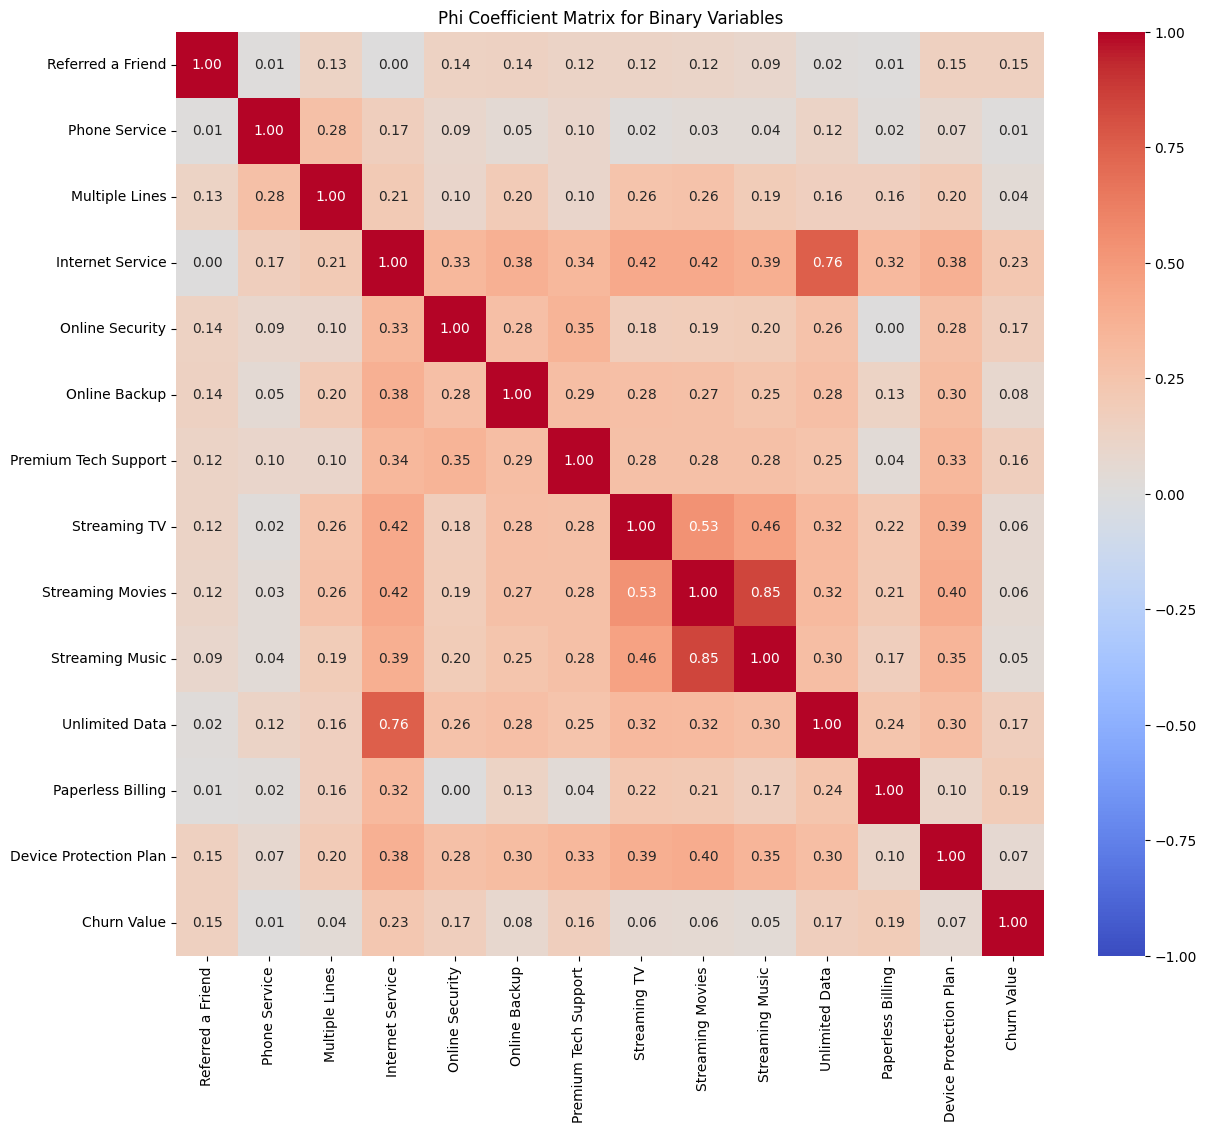

In [83]:
from scipy.stats import chi2_contingency

# List of variables for services
variables = ['Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',  'Premium Tech Support', 'Streaming TV',
             'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Device Protection Plan']

# List of variables to include in the correlation matrix
variables_matrix = ['Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',  'Premium Tech Support', 'Streaming TV',
             'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Device Protection Plan', 'Churn Value']



# Create a copy of the original DataFrame 
df_binary = df_Services_merged.copy()
# Convert Yes/No to binary (0/1) only for the selected variables
df_binary[variables] = df_binary[variables].applymap(lambda x: 1 if x == 'Yes' else 0)


# Function to calculate Phi Coefficient
def phi_coefficient(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    phi = (chi2 / df_binary.shape[0]) ** 0.5
    return phi

# Create an empty DataFrame for the correlation matrix
phi_matrix = pd.DataFrame(index=variables_matrix, columns=variables_matrix)

# Calculate the Phi Coefficient for each pair of variables
for var1 in variables_matrix:
    for var2 in variables_matrix:
        phi_matrix.loc[var1, var2] = phi_coefficient(df_binary[var1], df_binary[var2])

# Convert the values to numeric
phi_matrix = phi_matrix.astype(float)

# Print the Phi Coefficient matrix
print(phi_matrix)

# visualize the Phi Coefficient matrix using a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(phi_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Phi Coefficient Matrix for Binary Variables')
plt.show()



In [84]:
print(df_Services_merged)

     Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0     8779-QRDMV      1      Q3                No                    0   
1     7495-OOKFY      1      Q3               Yes                    1   
2     1658-BYGOY      1      Q3                No                    0   
3     4598-XLKNJ      1      Q3               Yes                    1   
4     4846-WHAFZ      1      Q3               Yes                    1   
...          ...    ...     ...               ...                  ...   
7038  2569-WGERO      1      Q3                No                    0   
7039  6840-RESVB      1      Q3               Yes                    1   
7040  2234-XADUH      1      Q3               Yes                    4   
7041  4801-JZAZL      1      Q3               Yes                    1   
7042  3186-AJIEK      1      Q3                No                    0   

      Tenure in Months    Offer Phone Service  \
0                    1     None            No   
1            

In [85]:
contingency_table = pd.crosstab(df_Services_merged['Referred a Friend'], df_Services_merged['Churn Value'])
print(contingency_table)

Churn Value           0     1
Referred a Friend            
No                 2576  1245
Yes                2598   624


C:\Users\Ruta\AppData\Local\Temp\ipykernel_30112\3014286185.py:14: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



                        Referred a Friend  Phone Service  Multiple Lines  \
Referred a Friend                0.999714       0.014936        0.132352   
Phone Service                    0.014936       0.999188        0.279204   
Multiple Lines                   0.132352       0.279204        0.999709   
Internet Service                 0.002496       0.171626        0.210215   
Online Security                  0.139195       0.092362        0.097790   
Online Backup                    0.142877       0.051807        0.201935   
Premium Tech Support             0.121458       0.095811        0.100255   
Streaming TV                     0.119589       0.022080        0.256856   
Streaming Movies                 0.115035       0.032466        0.258456   
Streaming Music                  0.089619       0.038750        0.193062   
Unlimited Data                   0.018710       0.121883        0.159362   
Paperless Billing                0.010805       0.016016        0.163238   
Device Prote

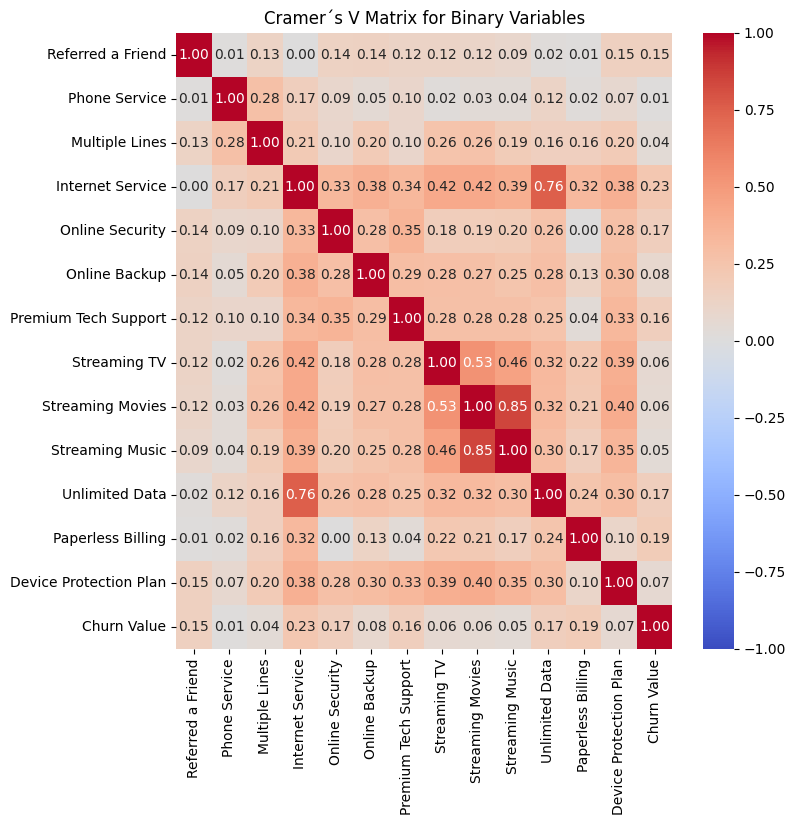

In [86]:
from scipy.stats import chi2_contingency

# List of variables for services
variables = ['Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',  'Premium Tech Support', 'Streaming TV',
             'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Device Protection Plan']

# List of variables to include in the correlation matrix
variables_matrix = ['Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',  'Premium Tech Support', 'Streaming TV',
             'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'Device Protection Plan', 'Churn Value']

# Create a copy of the original DataFrame 
df_binary = df_Services_merged.copy()
# Convert Yes/No to binary (0/1) only for the selected variables
df_binary[variables] = df_binary[variables].applymap(lambda x: 1 if x == 'Yes' else 0)


# Function to calculate cramers v
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Compute the Chi-Squared statistic
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculate Cramér's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2 / (n * min_dim))
    return cramers_v


# Create an empty DataFrame for the correlation matrix
cramers_matrix = pd.DataFrame(index=variables_matrix, columns=variables_matrix)

# Calculate the Phi Coefficient for each pair of variables
for var1 in variables_matrix:
    for var2 in variables_matrix:
        cramers_matrix.loc[var1, var2] = cramers_v(df_binary[var1], df_binary[var2])

# Convert the values to numeric
cramers_matrix = cramers_matrix.astype(float)

# Print the Phi Coefficient matrix
print(cramers_matrix)

# visualize the Phi Coefficient matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cramers_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cramer´s V Matrix for Binary Variables')
plt.show()

Phi Coefficient is used specifically for 2x2 tables with binary variables and can theoretically show directionality.
Cramér's V is a more general measure applicable to tables of any size and focuses on the strength of the association without directionality.
For 2x2 tables, these measures coincide and provide the same result, which is why they appear equivalent in such cases.

#### Monetary Value and Churn Value: correlation matrix

In [98]:
print(df_Services_merged)

     Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0     8779-QRDMV      1      Q3                No                    0   
1     7495-OOKFY      1      Q3               Yes                    1   
2     1658-BYGOY      1      Q3                No                    0   
3     4598-XLKNJ      1      Q3               Yes                    1   
4     4846-WHAFZ      1      Q3               Yes                    1   
...          ...    ...     ...               ...                  ...   
7038  2569-WGERO      1      Q3                No                    0   
7039  6840-RESVB      1      Q3               Yes                    1   
7040  2234-XADUH      1      Q3               Yes                    4   
7041  4801-JZAZL      1      Q3               Yes                    1   
7042  3186-AJIEK      1      Q3                No                    0   

      Tenure in Months    Offer Phone Service  \
0                    1     None            No   
1            

To investigate the relations between different monetary value variables and Churn Value and Satisfaction Score, the following Correlation Calculations were conducted:  

Pearson Correlation: Used for continuous vs. continuous variables (monetary value variables)  
Point-Biserial Correlation: Used for binary vs. continuous variables (Churn Value and monetary value variables)  
Eta-Squared: Used for categorical vs. continuous variables (Satisfaction Score and monetary value variables)  
Cramér's V: Used for binary vs. categorical variables (Churn Value and Satisfaction Score)  

                                   Avg Monthly Long Distance Charges  \
Avg Monthly Long Distance Charges                           1.000000   
Monthly Charge                                              0.138396   
Total Charges                                               0.069500   
Total Refunds                                              -0.018644   
Total Extra Data Charges                                    0.002414   
Total Long Distance Charges                                 0.599828   
Total Revenue                                               0.232291   
Churn Value                                                 0.008120   
Satisfaction Score                                          0.001127   
Tenure in Months                                            0.014596   

                                   Monthly Charge  Total Charges  \
Avg Monthly Long Distance Charges        0.138396       0.069500   
Monthly Charge                           1.000000       0.651236   
Tot

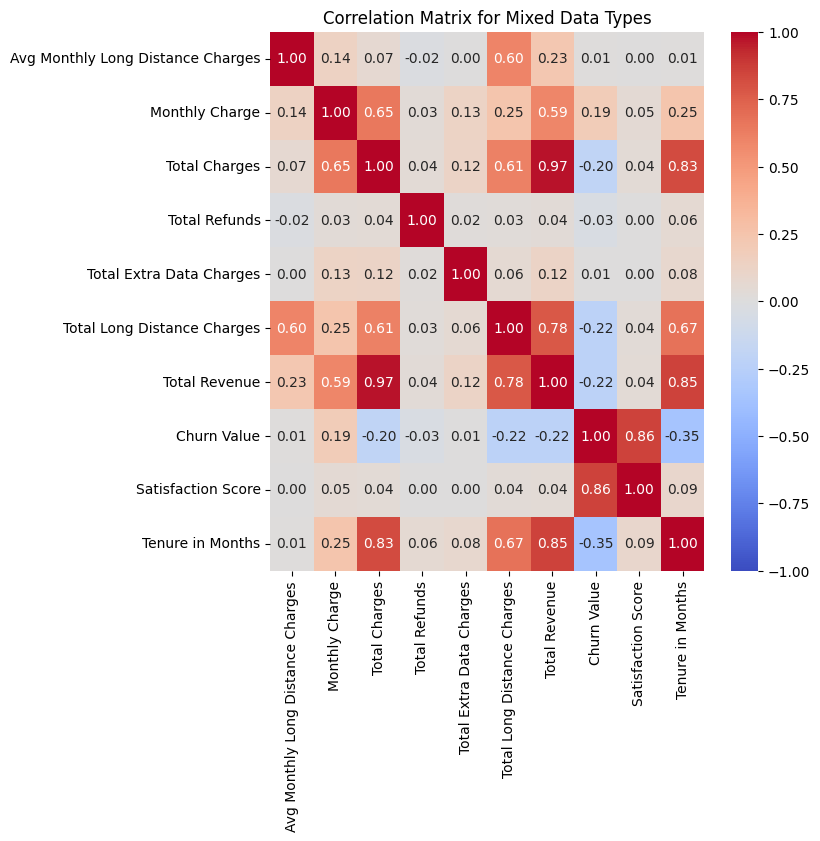

In [88]:
from scipy.stats import pointbiserialr, pearsonr


# Function to calculate Eta-Squared (Correlation Ratio)
def eta_squared(x, y):
    f_cat, _ = pd.factorize(x)
    cat_num = np.max(f_cat) + 1
    y_mean = np.mean(y)
    eta = sum([len(y[f_cat == i]) * (np.mean(y[f_cat == i]) - y_mean)**2 for i in range(cat_num)]) / sum((y - y_mean)**2)
    return eta

# List of variables to include in the correlation matrix
variables = ['Avg Monthly Long Distance Charges', 'Monthly Charge', 'Total Charges', 'Total Refunds', 
             'Total Extra Data Charges', 'Total Long Distance Charges',  'Total Revenue', 'Churn Value', 'Satisfaction Score', 'Tenure in Months']


# Initialize the correlation matrix
corr_matrix = pd.DataFrame(index=variables, columns=variables)

# Calculate Pearson correlation for continuous variables
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            if var1 not in ['Churn Value', 'Satisfaction Score'] and var2 not in ['Churn Value', 'Satisfaction Score']:
                corr_matrix.loc[var1, var2] = pearsonr(df_Services_merged[var1], df_Services_merged[var2])[0]
            elif var1 == 'Churn Value' and var2 not in ['Churn Value', 'Satisfaction Score']:
                corr_matrix.loc[var1, var2] = pointbiserialr(df_Services_merged[var1], df_Services_merged[var2])[0]
            elif var2 == 'Churn Value' and var1 not in ['Churn Value', 'Satisfaction Score']:
                corr_matrix.loc[var1, var2] = pointbiserialr(df_Services_merged[var2], df_Services_merged[var1])[0]
            elif var1 == 'Satisfaction Score' and var2 not in ['Churn Value', 'Satisfaction Score']:
                corr_matrix.loc[var1, var2] = eta_squared(df_Services_merged[var1], df_Services_merged[var2])
            elif var2 == 'Satisfaction Score' and var1 not in ['Churn Value', 'Satisfaction Score']:
                corr_matrix.loc[var1, var2] = eta_squared(df_Services_merged[var2], df_Services_merged[var1])
            elif var1 == 'Churn Value' and var2 == 'Satisfaction Score':
                corr_matrix.loc[var1, var2] = cramers_v(df_Services_merged[var1], df_Services_merged[var2])
            elif var2 == 'Churn Value' and var1 == 'Satisfaction Score':
                corr_matrix.loc[var1, var2] = cramers_v(df_Services_merged[var2], df_Services_merged[var1])
            else:
                corr_matrix.loc[var1, var2] = None
        else:
            corr_matrix.loc[var1, var2] = 1.0

# Convert to float
corr_matrix = corr_matrix.astype(float)

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Mixed Data Types')
plt.show()
